Final Project

*   By Zubear Nassimi
*   id 991 628 529
*   dataset: Parkinsons Telemonitoring
*   date: Nov 25 2024

In [ ]:
# import pycaret regression and init setup
!pip install pycaret

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving parkinsons_updrs.data to parkinsons_updrs (2).data


In [ ]:
import pandas as pd

# Load the dataset
data_file_path = 'parkinsons_updrs.data'
data = pd.read_csv(data_file_path)

# Preview the dataset
print(data.head())


   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [ ]:
# Remove the columns "subject#" and "motor_UPDRS"
data = data.drop(columns=["subject#", "motor_UPDRS"])

# Preview the updated dataset
print(data.head())


   age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0     5.6431       34.398    0.00662     0.000034     0.00401   
1   72    0    12.6660       34.894    0.00300     0.000017     0.00132   
2   72    0    19.6810       35.389    0.00481     0.000025     0.00205   
3   72    0    25.6470       35.810    0.00528     0.000027     0.00191   
4   72    0    33.6420       36.375    0.00335     0.000020     0.00093   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00317     0.01204  0.02565        0.230       0.01438       0.01309   
1      0.00150     0.00395  0.02024        0.179       0.00994       0.01072   
2      0.00208     0.00616  0.01675        0.181       0.00734       0.00844   
3      0.00264     0.00573  0.02309        0.327       0.01106       0.01265   
4      0.00130     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA   

In [ ]:
# Display column names
print(data.columns)

# Display dataset shape
print("Dataset Shape:", data.shape)

Index(['age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
Dataset Shape: (5875, 20)


In [ ]:
from pycaret.regression import *
s = setup(data, target = 'total_UPDRS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'total_UPDRS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0431,3.4038,1.8350,0.9698,0.0993,0.0527,1.5760
rf,Random Forest Regressor,0.9970,3.9886,1.9824,0.9648,0.0970,0.0487,5.2580
xgboost,Extreme Gradient Boosting,1.4024,4.8136,2.1891,0.9572,0.1051,0.0635,0.5430
catboost,CatBoost Regressor,1.5683,5.0367,2.2412,0.9554,0.1099,0.0726,6.6510
lightgbm,Light Gradient Boosting Machine,1.4491,5.0506,2.2359,0.9552,0.1051,0.0660,2.6060
dt,Decision Tree Regressor,1.0338,11.6850,3.3838,0.8969,0.1444,0.0456,0.0920
gbr,Gradient Boosting Regressor,3.9124,25.0955,5.0040,0.7779,0.1993,0.1667,2.0970
knn,K Neighbors Regressor,6.1178,65.4495,8.0813,0.4211,0.3002,0.2556,0.0440
ada,AdaBoost Regressor,7.2592,69.5362,8.3363,0.3833,0.3230,0.3186,0.8800
lr,Linear Regression,8.0521,94.6144,9.7232,0.1619,0.3638,0.3517,0.6490


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
 #choose catboost to avoid plot errors with some models
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6605,5.1925,2.2787,0.9536,0.1149,0.0765
1,1.4977,4.7901,2.1886,0.9522,0.1037,0.0696
2,1.4753,4.1993,2.0492,0.9610,0.1082,0.0705
3,1.6016,5.8755,2.4239,0.9500,0.1051,0.0697
4,1.5233,4.4269,2.1040,0.9631,0.0961,0.0663
5,1.6381,5.9417,2.4376,0.9533,0.1343,0.0858
6,1.5791,5.2196,2.2846,0.9543,0.1140,0.0720
7,1.5559,4.8149,2.1943,0.9545,0.1124,0.0733
8,1.6630,5.0038,2.2369,0.9567,0.0997,0.0709


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

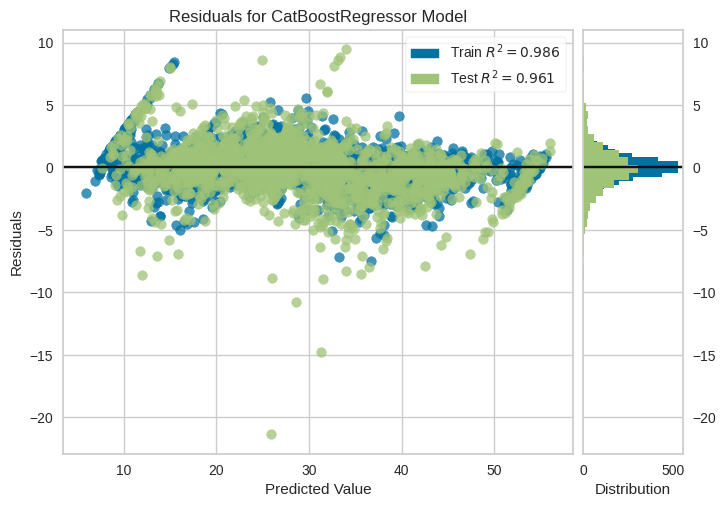

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

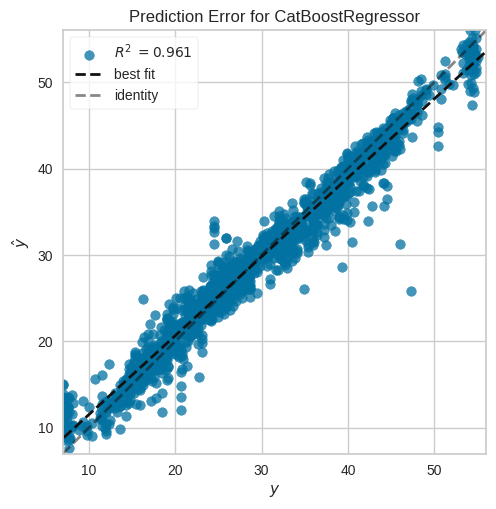

In [ ]:
# plot error
plot_model(best, plot = 'error')

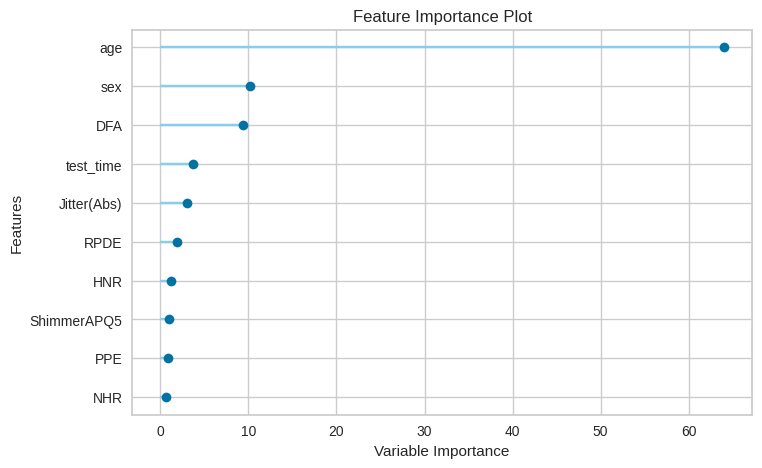

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.4689,4.5595,2.1353,0.9611,0.0992,0.0650


In [ ]:
# show predictions df
holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,24.148534
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,28.948300
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,24.081403
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,28.533292
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,42.921845


In [ ]:
new_data = data.copy()
new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,33.704239
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,35.415144
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.676278
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,36.505554
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.556284


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7a4f6017feb0>)])